<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Adapting_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# feature and target variabe
features = ['sepal_length','sepal_width','petal_length','petal_width']
x = df[features]
y = df['species']

### in below:
- n_estimators: number of weakly learners
- learning_rate: The weight assigned to the weekly learner with a default value of 1

In [20]:
# train test split and model creation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
adaboost = AdaBoostClassifier(n_estimators=150, learning_rate=1)
model = adaboost.fit(x_train, y_train)

In [21]:
# prediction & check accuracy
predictions = adaboost.predict(x_test)
print('Classification Report: \n', classification_report(y_test, predictions))
print('Accuracy Score: \n', accuracy_score(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.90      1.00      0.95        18
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy Score: 
 0.9555555555555556
Confusion Matrix: 
 [[12  0  0]
 [ 0 18  0]
 [ 0  2 13]]


### model accuracy is 95% 

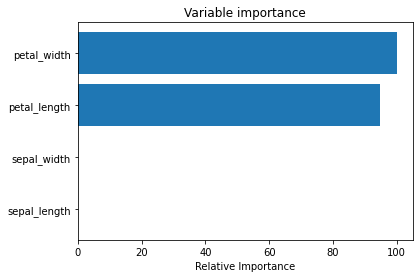

In [47]:
# feature importance
import matplotlib.pyplot as plt
%matplotlib inline

# plot feature importance
feature_importance = adaboost.feature_importances_

# make importances relative to max importance
feature_importance = (feature_importance/feature_importance.max()*100)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+0.5
plt.barh(pos, feature_importance[sorted_idx])
plt.xlabel('Relative Importance')
plt.yticks(pos, x.columns[sorted_idx])
plt.title('Variable importance')
plt.show()

[0.         0.         0.48666667 0.51333333]


<BarContainer object of 4 artists>

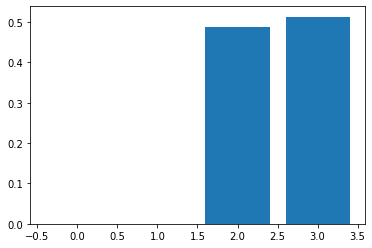

In [59]:
print(adaboost.feature_importances_)
plt.bar(range(len(adaboost.feature_importances_)), adaboost.feature_importances_)

## Ada Boost uses Decision Tree as the default model, but we can also use any other model for boosting. The following code shows how to perform boosting using the support vector machine model.

In [52]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(probability=True, kernel='linear')

# create adaboost classifier object
abcSV = AdaBoostClassifier(n_estimators=100, base_estimator=svc, learning_rate=1)
modelSVC = abcSV.fit(x_train, y_train)
predictions = modelSVC.predict(x_test)

print('Classification Report: \n', classification_report(y_test, predictions))
print('Accuracy Score: \n', accuracy_score(y_test, predictions))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.89      0.92        19
   virginica       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45

Accuracy Score: 
 0.9333333333333333

 Confusion Matrix: 
 [[12  0  0]
 [ 0 17  2]
 [ 0  1 13]]


### SVM adaboost accuracy is 93%